# Práctica 2 - Parte 2: Sistema masa-resorte con rozamiento

En esta práctica se estudiará el sistema masa-resorte-amortiguador clásico, que es un ejemplo típico de sistema dinámico de segundo orden.

## Enunciado

1. Considera el sistema masa-resorte-amortiguador descrito por la ecuación diferencial:

   $
   m \ddot{x} + b \dot{x} + k x = 0
   $
  
   donde:
   - $m$ es la masa,
   - $b$ es el coeficiente de rozamiento,
   - $k$ es la constante del resorte.

2. Implementa el modelo en Python y simula la evolución temporal para distintos valores de $b$, con $m$ y $k$ fijos.

3. Ajusta los parámetros para obtener los distintos tipos de comportamiento dinámico:
   - Sin amortiguamiento ($\zeta=0$).
   - Subamortiguado ($0 < \zeta < 1$).
   - Críticamente amortiguado ($\zeta=1$).
   - Sobreamortiguado ($\zeta>1$).

4. Representa gráficamente las respuestas y compara los resultados.


## Ejercicio propuesto

Implementa en Python el sistema masa resorte con rozamiento y representa la evolución temporal $x(t)$ con distintos valores de los parámetros. Ajusta los parámetros para obtener los comportamientos que se indican en el punto 3.


El código implementa la simulación numérica del sistema masa-resorte con amortiguamiento utilizando el método de integración de ecuaciones diferenciales ordinarias (ODE) proporcionado por la biblioteca SciPy. La ecuación diferencial $ m \ddot{x} + b \dot{x} + k x = 0 $ se reformula como un sistema de primer orden para facilitar la resolución numérica. Se fijan los valores de $ m = 1 $ kg y $ k = 1 $ N/m, y se varía el coeficiente de amortiguamiento $ b $ para obtener los diferentes regímenes dinámicos basados en el factor de amortiguamiento $ \zeta = \frac{b}{2 \sqrt{m k}} $. Las condiciones iniciales son $ x(0) = 1 $ m y $ \dot{x}(0) = 0 $ m/s. Finalmente se genera una gráfica que compara las respuestas temporales $ x(t) $ para cada caso.

### Explicación del Código

1. **Importación de Bibliotecas**: 
   - `scipy.integrate.odeint`: Función principal para integrar numéricamente el sistema de ODEs. Resuelve el sistema convirtiendo la ecuación de segundo orden en dos ecuaciones de primer orden.

2. **Definición de la Función del Sistema Dinámico (`damped`)**:
   - Esta función define las derivadas del sistema: $ \dot{x} = v $ (donde $ v = \dot{x} $) y $ \dot{v} = -\frac{b}{m} v - \frac{k}{m} x $.
   - Los parámetros de entrada son el vector de estado $ X = [x, v] $, el tiempo $ t $, y los parámetros físicos $ b, m, k $.|
   - Es crucial que la función devuelva una lista con las dos derivadas para que `odeint` pueda iterar correctamente. Esto representa la reformulación vectorial de la ecuación original.

3. **Parámetros Fijos y Variables**:
   - $ m = 1.0 $ y $ k = 1.0 $: Valores fijos para simplificar el cálculo de $ \zeta $.
   - Lista de $ b $: [0.0, 1.0, 2.0, 4.0], que corresponden a $ \zeta = 0 $ (sin amortiguamiento, oscilaciones puras), $ \zeta = 0.5 $ (subamortiguado, oscilaciones decrecientes), $ \zeta = 1 $ (críticamente amortiguado, retorno rápido sin oscilar), y $ \zeta = 2 $ (sobreamortiguado, retorno lento sin oscilar).
   - Vector de tiempo $ t $: De 0 a 20 segundos con 1000 puntos, suficiente para capturar la dinámica sin aliasing.
   - Condiciones iniciales $ X0 = [1.0, 0.0] $: Desplazamiento inicial de 1 metro sin velocidad inicial.

4. **Integración y Graficación**:
   - Para cada valor de $ b $, se llama a odeint que resuelve el sistema y devuelve la solución sol, donde `sol[:, 0]` es $ x(t) $.
   - Se grafica $ x(t) $ para cada $ b $ en la misma figura, con una leyenda que indica el valor de $ b $.
   - Etiquetas de ejes: Tiempo en segundos y posición $ x $ en metros. La gráfica muestra cómo aumenta el amortiguamiento reduce las oscilaciones hasta eliminarlas por completo.


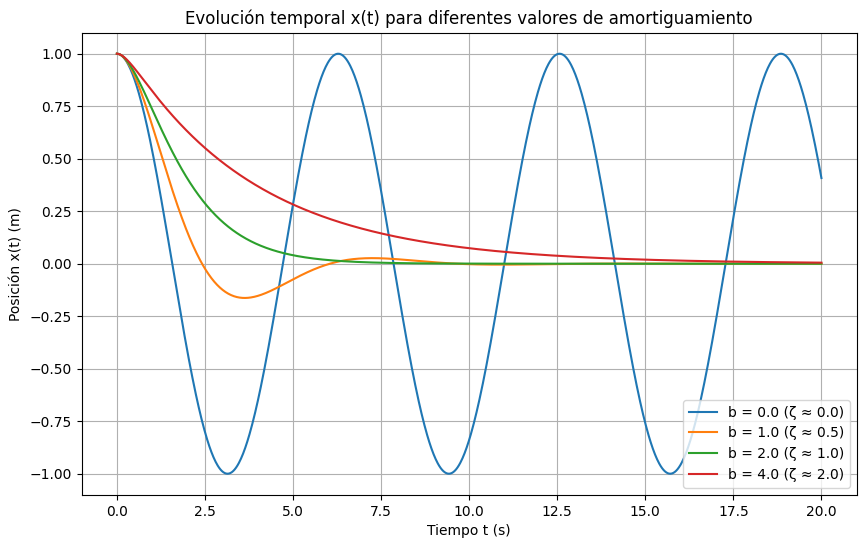

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# definicion del sistema de ecuaciones diferenciales
def damped(X, t, b, m, k):
    x, v = X  
    dxdt = v  # Derivada de x: velocidad
    dvdt = - (b / m) * v - (k / m) * x  # Derivada de v: aceleración según la ecuación
    return [dxdt, dvdt]  # se retornan las derivadas como lista

# Parámetros fijos
m = 1.0  # Masa en kg
k = 1.0  # Constante del resorte en N/m

# Valores de b para diferentes regímenes (zeta = b / (2 * sqrt(m * k)))
b_values = [0.0, 1.0, 2.0, 4.0]  # zeta = 0, 0.5, 1, 2

# Condiciones iniciales: x(0) = 1 m, v(0) = 0 m/s
X0 = [1.0, 0.0]

# Vector de tiempo: de 0 a 20 s con 1000 particiones
t = np.linspace(0, 20, 1000)


plt.figure(figsize=(10, 6))
for b in b_values: 
    '''
        para cada valor de b se integrara y graficara el sistema, 
        se usa odeint que integra numéricamente el sistema y finalmente
        la solucion es lo que se grafica
    
    '''
    sol = odeint(damped, X0, t, args=(b, m, k))
    
    plt.plot(t, sol[:, 0], label=f'b = {b} (ζ ≈ {b/2:.1f})')

plt.xlabel('Tiempo t (s)')
plt.ylabel('Posición x(t) (m)')
plt.title('Evolución temporal x(t) para diferentes valores de amortiguamiento')
plt.legend()
plt.grid(True)
plt.show()


## Ejercicio propuesto OPCIONAL

Representa las raíces en el plano complejo para cada uno de los casos.

El siguiente código calcula y visualiza las raíces de la ecuación característica del sistema en el plano complejo para cada régimen de amortiguamiento. La ecuación característica es $ m r^2 + b r + k = 0 $ cuyas raíces determinan el comportamiento: raíces imaginarias puras (oscilatorio), complejas con parte real negativa (amortiguado), o reales negativas (sobreamortiguado). Se usan los mismos parámetros $ m=1 $ $ k=1 $ y los valores de $ b $ del código anterior. Las raíces se calculan analíticamente usando la fórmula cuadrática y se grafican en el plano real-imaginario, donde el eje real representa la parte exponencial de decaimiento y el imaginario la frecuencia oscilatoria.

### Explicación del Código


1. **Fórmula de las Raíces**:
   - La ecuación característica es $ r^2 + \frac{b}{m} r + \frac{k}{m} = 0 $
   - Raíces: $ r = \frac{ - \frac{b}{m} \pm \sqrt{ (\frac{b}{m})^2 - 4 \frac{k}{m} } }{2} $.
   - Con $ m=1 $ $ k=1 $: $ r = \frac{ -b \pm \sqrt{ b^2 - 4 } }{2} $.

2. **Cálculo de Raíces para Cada $ b $**:
   - Se itera sobre la lista de $ b $ calculando el discriminante $ d = b^2 - 4 $.
   - Las raíces $ r1, r2 $ se computan con `np.sqrt` para manejar el caso complejo automáticamente.
   - Se extraen las partes real e imaginaria de cada raíz usando `.real` e `.imag`.

3. **Graficación en el Plano Complejo**:
   - Eje x: parte real (decaimiento, siempre negativo o cero).
   - Eje y: parte imaginaria (frecuencia angular).
   - Cada par de raíces se marca con un símbolo diferente y una etiqueta que indica $ b $ y $ \zeta $.
   - Líneas verticales en el eje imaginario ayudan a visualizar los casos oscilatorios. La gráfica muestra cómo las raíces se mueven hacia la izquierda (mayor decaimiento) al aumentar $ b $ y pierden la componente imaginaria en el caso sobreamortiguado.



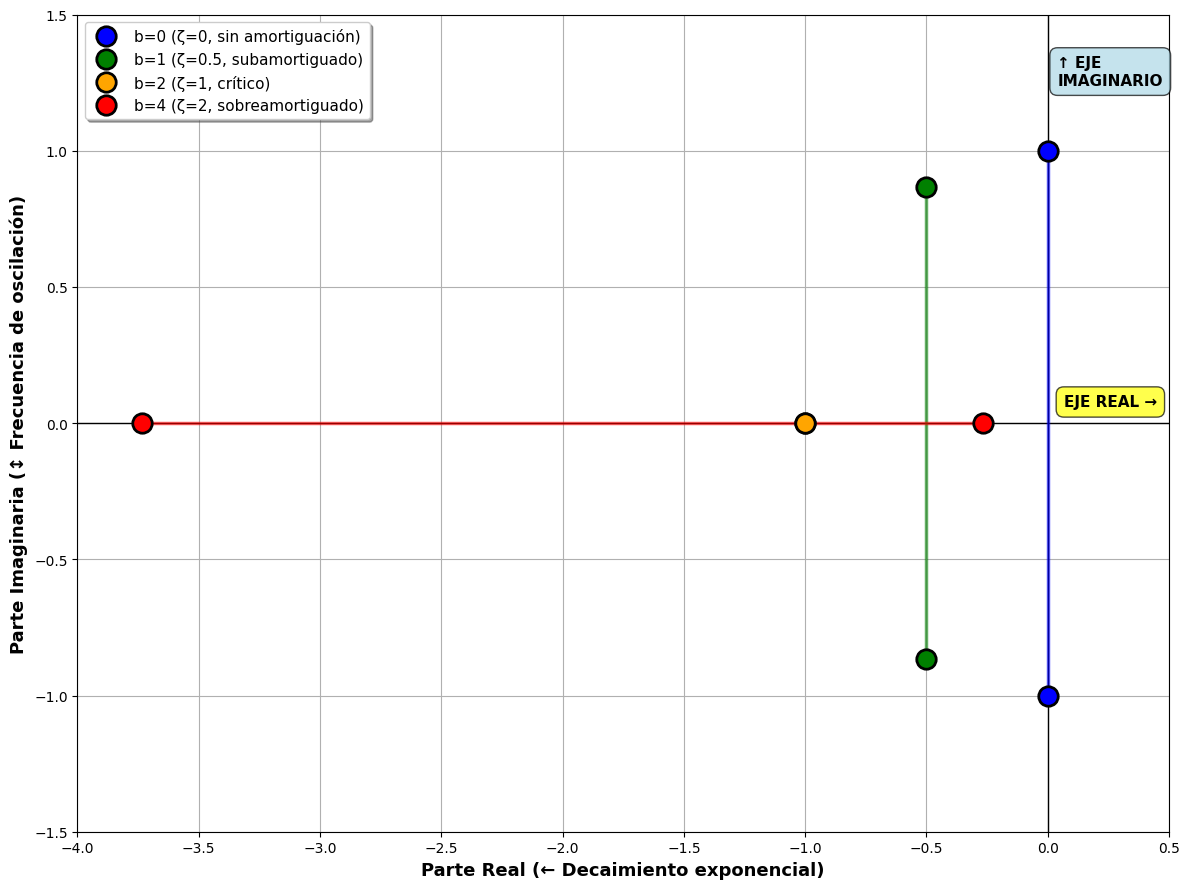


b=0 (ζ=0, sin amortiguación)
  Raíz 1 (r₁): 0.0000 +1.0000j
  Raíz 2 (r₂): -0.0000 -1.0000j
----------------------------------------------------------------------

b=1 (ζ=0.5, subamortiguado)
  Raíz 1 (r₁): -0.5000 +0.8660j
  Raíz 2 (r₂): -0.5000 -0.8660j
----------------------------------------------------------------------

b=2 (ζ=1, crítico)
  Raíz 1 (r₁): -1.0000 +0.0000j
  Raíz 2 (r₂): -1.0000 +0.0000j
----------------------------------------------------------------------

b=4 (ζ=2, sobreamortiguado)
  Raíz 1 (r₁): -0.2679 +0.0000j
  Raíz 2 (r₂): -3.7321 +0.0000j
----------------------------------------------------------------------


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros fijos
m = 1.0  # Masa
k = 1.0  # Constante del resorte

colors = ['blue', 'green', 'orange', 'red']

b_values = [0.0, 1.0, 2.0, 4.0]
labels = ['b=0 (ζ=0, sin amortiguación)', 'b=1 (ζ=0.5, subamortiguado)', 'b=2 (ζ=1, crítico)', 'b=4 (ζ=2, sobreamortiguado)']


fig, ax = plt.subplots(figsize=(12, 9))

# calculo de las raices segun su formula 
for i, b in enumerate(b_values):

    discriminant = (b / m)**2 - 4 * (k / m)
    discriminant_complex = discriminant + 0j  # Convertir a tipo complejo
    
    # Raíces (fórmula cuadrática con sqrt compleja)
    r1 = (-b / m + np.sqrt(discriminant_complex)) / 2
    r2 = (-b / m - np.sqrt(discriminant_complex)) / 2
    
    # Partes real e imaginaria
    real1, imag1 = r1.real, r1.imag
    real2, imag2 = r2.real, r2.imag
    

    ax.plot(real1, imag1, 'o', markersize=14, label=labels[i], color =colors[i],
    markeredgecolor='black', markeredgewidth=2, zorder=10)
    
    ax.plot(real2, imag2, 'o', color=colors[i], markersize=14,
            markeredgecolor='black', markeredgewidth=2, zorder=10)
    
    # unimos las dos raices con una linea
    ax.plot([real1, real2], [imag1, imag2], color=colors[i], 
            linestyle='-', alpha=0.6, linewidth=2.5, zorder=8)


# bordes mas negros para los ejes
ax.grid(True)
ax.axhline(y=0, color='black', linewidth=1, zorder=5)  
ax.axvline(x=0, color='black', linewidth=1, zorder=5) 

ax.set_xlabel('Parte Real (← Decaimiento exponencial)', 
              fontsize=13, fontweight='bold')

ax.set_ylabel('Parte Imaginaria (↕ Frecuencia de oscilación)', 
              fontsize=13, fontweight='bold')

# unas labels para situar mejor los ejes
ax.text(0.45, 0.05, 'EJE REAL →', fontsize=11, fontweight='bold', 
        color='black', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax.text(0.04, 1.35, '↑ EJE\nIMAGINARIO', fontsize=11, fontweight='bold', 
        color='black', ha='left', va='top',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))

ax.legend(loc='upper left', fontsize=11, fancybox=True, shadow=True)
ax.set_xlim(-4, 0.5)
ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

for i, b in enumerate(b_values):
    discriminant = (b / m)**2 - 4 * (k / m)
    discriminant_complex = discriminant + 0j
    r1 = (-b / m + np.sqrt(discriminant_complex)) / 2
    r2 = (-b / m - np.sqrt(discriminant_complex)) / 2
    
    print(f"\n{labels[i]}")
    print(f"  Raíz 1 (r₁): {r1.real:.4f} {r1.imag:+.4f}j")
    print(f"  Raíz 2 (r₂): {r2.real:.4f} {r2.imag:+.4f}j")
    print("-"*70)



## Preguntas de reflexión

#### 1. ¿Qué diferencias observas en la respuesta entre el caso sin amortiguamiento y el caso subamortiguado?


En el caso sin amortiguamiento (b=0, ζ=0), la respuesta temporal x(t) muestra oscilaciones sinusoidales puras con amplitud constante, sin decaimiento, lo que se refleja en raíces puramente imaginarias en el plano complejo (0 ± 1j), indicando una frecuencia de oscilación constante sin componente de decaimiento.​

Por el contrario, en el caso subamortiguado (b=1, ζ=0.5), x(t) exhibe oscilaciones con amplitud decreciente exponencialmente, cruzando el eje de equilibrio múltiples veces pero con picos cada vez más pequeños, correspondiente a raíces complejas conjugadas (-0.5 ± 0.866j) con parte real negativa (decaimiento) y parte imaginaria no cero (oscilación persistente pero amortiguada).​

La diferencia clave radica en la energía: sin amortiguamiento, la energía se conserva indefinidamente en oscilaciones; en subamortiguado, la fricción disipa energía gradualmente, haciendo que el sistema regrese al equilibrio de forma oscilatoria pero controlada.


#### 2. ¿Por qué en el caso crítico la respuesta es la más rápida posible sin oscilaciones?

El caso críticamente amortiguado (b=2, ζ=1) ofrece la respuesta más rápida sin oscilaciones porque las raíces son reales y dobles (-1 + 0j), lo que genera una solución x(t) = (A + Bt)e^{-t} donde el término lineal Bt optimiza el retorno al equilibrio en el menor tiempo posible sin sobrepasar ni oscilar, como se ve en la curva verde que decae suavemente desde x=1 hacia cero sin cruzar en nigun caso el eje x.​

Esta configuración representa el límite entre oscilatorio y no oscilatorio: cualquier amortiguamiento menor introduce oscilaciones (subamortiguado, curva naranja con cruces de eje x), mientras que mayor genera decaimiento más lento (sobreamortiguado, curva roja con menos curvatura).​

Matemáticamente, el factor ζ=1 minimiza el tiempo de asentamiento al maximizar la componente de decaimiento sin inestabilidad oscilatoria.

#### 3. ¿Qué efecto tiene un rozamiento excesivo (sobreamortiguado) sobre la rapidez de la respuesta?

En el sobreamortiguado (b=4, ζ=2), el rozamiento excesivo hace que la respuesta sea más lenta: x(t) decae sin oscilar, pero con una aproximación gradual y prolongada al equilibrio, como muestra la curva roja que permanece por encima del eje y se acerca a cero más despacio que el caso crítico.​

Esto se debe a raíces reales distintas y ambas muy negativas (aprox. -0.268 ± 0j y -3.732 ± 0j), donde la raíz menos negativa domina el decaimiento lento, resultando en un "arrastre" excesivo que impide un retorno rápido.​

El efecto negativo es la reducción de la velocidad de respuesta: aunque estable, el sistema pierde eficiencia.

#### 4. ¿Cómo se relaciona el coeficiente de amortiguamiento $\zeta$ con la posición de las raíces en el plano complejo?


El coeficiente de amortiguamiento ζ = b/(2√(mk)) determina la posición de las raíces r = [-b/m ± √((b/m)^2 - 4k/m)]/2 en el plano complejo: para ζ<1, las raíces tienen parte imaginaria ≠ 0; para ζ=1, raíces reales dobles en el eje real negativo (sin imaginaria, decaimiento óptimo); y para ζ>1, raíces reales separadas en el eje real (sin imaginaria, decaimiento lento).​

Específicamente, ζ controla el discriminante Δ = (b/m)^2 - 4k/m = 4ζ² - 4: si Δ<0 (ζ<1), imaginaria = √(-Δ)/2 >0; si Δ=0 (ζ=1), imaginaria=0 y real=-√(k/m); si Δ>0 (ζ>1), dos reales negativas separadas.​

En general, ζ≥1 mantiene las raíces en el semiplano izquierdo (estabilidad, parte real ≤0), pero valores altos de ζ desplazan las raíces más a la izquierda (mayor decaimiento, pero más lento en el dominante).​